In [1]:
from clustering_utils import prep_to_cluster, find_friends, get_mocks, unison_shuffled_copies, get_data
from cluster_plot import vis_tsne, vis_cands, plot_data, vis_clustering

In [2]:
from rfpipe import candidates

In [3]:
import glob, os
import numpy as np
%matplotlib inline
import tqdm

In [4]:
# with open('no_rfi_only_transient.txt', 'r') as f:
#     a = f.readlines()
    
# with open('only_rfi_unique.txt', 'r') as f:
#     b = f.readlines()


with open('pure_real_pkls.txt', 'r') as f:
    a = f.readlines()
    
with open('pure_rfi_pkls.txt', 'r') as f:
    b = f.readlines()

In [5]:
clean_pkls = [l[:-1] for l in a]
rfi_pkls = [l[:-1] for l in b]

In [29]:
def save_one(clean_pkl, rfi_pkl=None, rfi_frac=None, outdir = 'dataset/'):
#     rand_clean_pkl = np.random.choice(clean_pkls)
    c_pkl = clean_pkl
    c_data, c_labels, c_snrs = get_data(c_pkl, 1, 1)

    if rfi_pkl:
        rand_rfi_pkl = rfi_pkl #np.random.choice(rfi_pkls)
        if not rfi_frac: 
            rfi_frac = np.random.uniform(0.2, 1)
        r_pkl = rand_rfi_pkl
        r_data, r_labels, r_snrs = get_data(r_pkl, rfi_frac, -1)
    
        data = np.concatenate((r_data, c_data))
        labels = np.concatenate((r_labels, c_labels))
        snrs = np.concatenate((r_snrs, c_snrs))
        name = f'clean_{len(c_data)}_rfi_{len(r_data)}_frac_{rfi_frac:f}.npz'

    else:
        if c_data.any():
            data = c_data
            labels = c_labels
            snrs = c_snrs
            bn = os.path.basename(c_pkl)
            name = f'{bn}_clean_{len(c_data)}.npz'
        else:
            return None

    d, l, s = unison_shuffled_copies(data, labels, snrs)
    
    np.savez(outdir + name, cands=d, labels=l, snrs=s)
    return name

In [30]:
# making clean dataset
a = []
for c in clean_pkls:
    a.append(save_one(c, rfi_pkl=None, outdir='clean_dataset/'))

2020-09-25 14:09:48,370 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.76716866684_config_C_band_C
2020-09-25 14:09:48,373 - root - INFO - Pre-processing data of 363 candidates for clustering.
2020-09-25 14:09:48,759 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.74810304784_config_A_band_X
2020-09-25 14:09:48,761 - root - INFO - Pre-processing data of 39 candidates for clustering.
2020-09-25 14:09:49,120 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.7834934211_config_C_band_S
2020-09-25 14:09:49,121 - root - INFO - Pre-processing data of 44 candidates for clustering.
2020-09-25 14:09:49,465 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.78076931967_config_A_band_C
2020-09-25 14:09:49,466 - root - INFO - Pre-processing data of 9 candidates for clustering.
2020-09-25 14:09:49,810 - root - INFO - Processing /hyrule/da

2020-09-25 14:10:01,080 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606136613_config_D_band_S
2020-09-25 14:10:01,081 - root - INFO - Pre-processing data of 160 candidates for clustering.
2020-09-25 14:10:01,443 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.76330083463_config_D_band_S
2020-09-25 14:10:01,445 - root - INFO - Pre-processing data of 51 candidates for clustering.
2020-09-25 14:10:01,931 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71185739317_config_B_band_X
2020-09-25 14:10:01,932 - root - INFO - Pre-processing data of 137 candidates for clustering.
2020-09-25 14:10:02,296 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.74678856189_config_C_band_S
2020-09-25 14:10:02,297 - root - INFO - Pre-processing data of 96 candidates for clustering.
2020-09-25 14:10:02,706 - root - INFO - Processing /hyrule

2020-09-25 14:10:13,959 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.76776498026_config_C_band_C
2020-09-25 14:10:13,960 - root - INFO - Pre-processing data of 2 candidates for clustering.
2020-09-25 14:10:14,312 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.776583697305_config_B_band_X
2020-09-25 14:10:14,313 - root - INFO - Pre-processing data of 12 candidates for clustering.
2020-09-25 14:10:14,657 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.762233600275_config_D_band_S
2020-09-25 14:10:14,658 - root - INFO - Pre-processing data of 6 candidates for clustering.
2020-09-25 14:10:15,023 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71605264379_config_C_band_X
2020-09-25 14:10:15,024 - root - INFO - Pre-processing data of 96 candidates for clustering.


In [34]:
# make mixed dataset 
a = []
for i in tqdm.tqdm(range(100)):
    rand_clean_pkl = np.random.choice(clean_pkls)
    rand_rfi_pkl = np.random.choice(rfi_pkls)
    a.append(save_one(rand_clean_pkl, rand_rfi_pkl, outdir='dataset/'))

  0%|          | 0/100 [00:00<?, ?it/s]2020-09-25 14:11:14,622 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71185726331_config_D_band_C
2020-09-25 14:11:14,624 - root - INFO - Pre-processing data of 31 candidates for clustering.
2020-09-25 14:11:15,123 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636338140
2020-09-25 14:11:15,124 - root - INFO - Pre-processing data of 29 candidates for clustering.
  1%|          | 1/100 [00:00<01:33,  1.05it/s]2020-09-25 14:11:15,570 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71681107247_config_C_band_L
2020-09-25 14:11:15,571 - root - INFO - Pre-processing data of 11 candidates for clustering.
2020-09-25 14:11:16,015 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37300249.58755.35827982639_1569756398160
2020-0

 15%|█▌        | 15/100 [00:12<01:10,  1.21it/s]2020-09-25 14:11:26,954 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.74420949054_config_B_band_X
2020-09-25 14:11:26,955 - root - INFO - Pre-processing data of 82 candidates for clustering.
2020-09-25 14:11:27,405 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636303800
2020-09-25 14:11:27,407 - root - INFO - Pre-processing data of 16 candidates for clustering.
 16%|█▌        | 16/100 [00:13<01:12,  1.16it/s]2020-09-25 14:11:27,885 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.7117877819_config_D_band_L
2020-09-25 14:11:27,887 - root - INFO - Pre-processing data of 458 candidates for clustering.
2020-09-25 14:11:28,293 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959433

 30%|███       | 30/100 [00:24<00:54,  1.28it/s]2020-09-25 14:11:38,979 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71179019092_config_C_band_X
2020-09-25 14:11:38,980 - root - INFO - Pre-processing data of 56 candidates for clustering.
2020-09-25 14:11:39,320 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19B-223.sb37535659.eb37564144.58814.83778475694_1574889562789
2020-09-25 14:11:39,324 - root - INFO - Pre-processing data of 3619 candidates for clustering.
 31%|███       | 31/100 [00:25<00:52,  1.30it/s]2020-09-25 14:11:39,719 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.74678856189_config_C_band_S
2020-09-25 14:11:39,720 - root - INFO - Pre-processing data of 96 candidates for clustering.
2020-09-25 14:11:40,063 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_15686363

 45%|████▌     | 45/100 [00:35<00:41,  1.31it/s]2020-09-25 14:11:50,496 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71179017713_config_C_band_C
2020-09-25 14:11:50,497 - root - INFO - Pre-processing data of 74 candidates for clustering.
2020-09-25 14:11:50,837 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-163.sb38004437.eb38005408.58938.62244413194_1585584639210
2020-09-25 14:11:50,840 - root - INFO - Pre-processing data of 2782 candidates for clustering.
 46%|████▌     | 46/100 [00:36<00:41,  1.30it/s]2020-09-25 14:11:51,288 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.77869663424_config_D_band_L
2020-09-25 14:11:51,289 - root - INFO - Pre-processing data of 72 candidates for clustering.
2020-09-25 14:11:51,628 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_15686363

 60%|██████    | 60/100 [00:47<00:32,  1.21it/s]2020-09-25 14:12:02,450 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.72305938374_config_C_band_C
2020-09-25 14:12:02,451 - root - INFO - Pre-processing data of 154 candidates for clustering.
2020-09-25 14:12:02,828 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636332080
2020-09-25 14:12:02,830 - root - INFO - Pre-processing data of 17 candidates for clustering.
 61%|██████    | 61/100 [00:48<00:32,  1.20it/s]2020-09-25 14:12:03,293 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.77954489103_config_A_band_C
2020-09-25 14:12:03,295 - root - INFO - Pre-processing data of 175 candidates for clustering.
2020-09-25 14:12:03,634 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-163.sb38004437.eb38005408.58938.62244413194_15855846

 75%|███████▌  | 75/100 [00:59<00:18,  1.33it/s]2020-09-25 14:12:13,814 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.7117877819_config_D_band_L
2020-09-25 14:12:13,815 - root - INFO - Pre-processing data of 458 candidates for clustering.
2020-09-25 14:12:14,154 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/19B-223.sb37535659.eb37536291.58806.85424090278
2020-09-25 14:12:14,158 - root - INFO - Pre-processing data of 4178 candidates for clustering.
 76%|███████▌  | 76/100 [00:59<00:17,  1.34it/s]2020-09-25 14:12:14,560 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.76944640406_config_D_band_X
2020-09-25 14:12:14,561 - root - INFO - Pre-processing data of 159 candidates for clustering.
2020-09-25 14:12:14,900 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636332080
2020-09-25 14:12

 90%|█████████ | 90/100 [01:10<00:07,  1.31it/s]2020-09-25 14:12:25,291 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71490131411_config_C_band_X
2020-09-25 14:12:25,292 - root - INFO - Pre-processing data of 227 candidates for clustering.
2020-09-25 14:12:25,630 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636334100
2020-09-25 14:12:25,632 - root - INFO - Pre-processing data of 23 candidates for clustering.
 91%|█████████ | 91/100 [01:11<00:06,  1.30it/s]2020-09-25 14:12:26,067 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.711793289156_config_C_band_L
2020-09-25 14:12:26,068 - root - INFO - Pre-processing data of 4 candidates for clustering.
2020-09-25 14:12:26,406 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_158795943

In [30]:
bad_rfi_pkl = '/hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19B-223.sb37535659.eb37564144.58814.83778475694_1574889562789/cands_realfast_19B-223.sb37535659.eb37564144.58814.83778475694_1574889562789.1.1.pkl'


bad_rfi_pkl = glob.glob('/hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390/*pkl')[0]

In [31]:
# strong_real_pkl = glob.glob('/hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.711787758875_config_C_band_S/*pkl')[0]

strong_real_pkl = glob.glob('/hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S/*pkl')[0]

In [27]:
d,l,s = get_data(strong_real_pkl, frac=1, label=0)

2020-09-29 12:33:39,137 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 12:33:39,139 - root - INFO - Pre-processing data of 307 candidates for clustering.


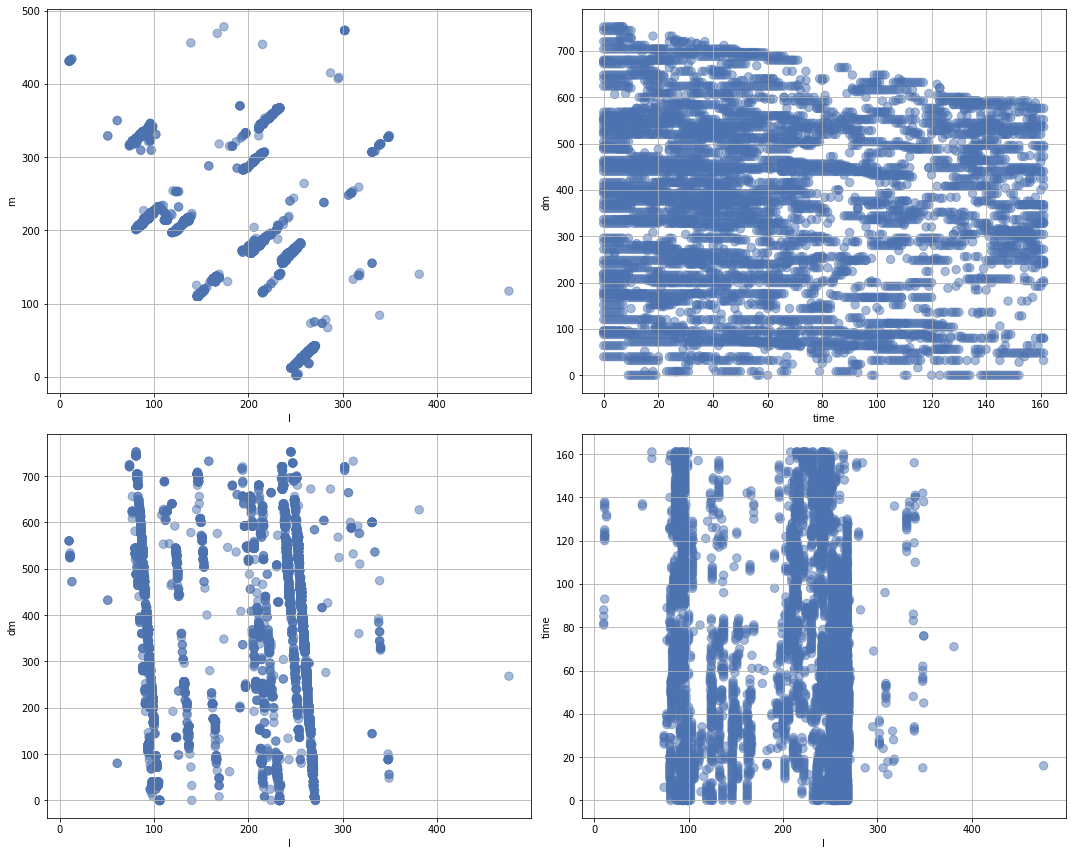

In [24]:
plot_data(d, labels=l, snrs=s, tsne_res=None, title=None, save=False)

In [13]:
def save_one_wrt_rfi_frac(clean_pkl, rfi_pkl=None, rfi_frac=None, outdir = 'dataset/'):
    c_pkl = clean_pkl
    c_data, c_labels, c_snrs = get_data(c_pkl, 1, 1)

    rand_rfi_pkl = rfi_pkl
    r_pkl = rand_rfi_pkl
    r_data, r_labels, r_snrs = get_data(r_pkl, 1, -1)

    if not rfi_frac:
        n_frb = c_data.shape[0] 
        n_rfi = r_data.shape[0]
        max_rfi_frac = n_rfi / (n_frb + n_rfi)
        rfi_frac = np.random.uniform(0.1, max_rfi_frac)
        size = rfi_frac*n_frb/(1-rfi_frac)
        if size > n_rfi:
            return None
        
    indx = np.random.choice(r_data.shape[0], size=int(size), replace=False)
    r_data_use = np.take(r_data, indx, axis=0)    
    r_snrs_use = np.take(r_snrs, indx, axis=0)
    r_labels_use = np.take(r_labels, indx, axis=0)
    
    data = np.concatenate((r_data_use, c_data))
    labels = np.concatenate((r_labels_use, c_labels))
    snrs = np.concatenate((r_snrs_use, c_snrs))
    name = f'clean_{len(c_data)}_rfi_{len(r_labels_use)}_frac_{rfi_frac:f}.npz'

    d, l, s = unison_shuffled_copies(data, labels, snrs)
    
    np.savez(outdir + name, cands=d, labels=l, snrs=s)
    return name

In [15]:
# make mixed dataset using all clean and all rfi examples but rfi frac is wrt total
a = []
for i in tqdm.tqdm(range(100)):
    rand_clean_pkl = np.random.choice(clean_pkls)
    rand_rfi_pkl = np.random.choice(rfi_pkls)
    a.append(save_one_wrt_rfi_frac(rand_clean_pkl, rand_rfi_pkl, outdir='dataset/'))



  0%|          | 0/100 [00:00<?, ?it/s]2020-10-01 12:18:18,362 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.751650492835_config_D_band_X
2020-10-01 12:18:18,364 - root - INFO - Pre-processing data of 90 candidates for clustering.
2020-10-01 12:18:18,801 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636332080
2020-10-01 12:18:18,802 - root - INFO - Pre-processing data of 17 candidates for clustering.


  1%|          | 1/100 [00:00<01:33,  1.06it/s]2020-10-01 12:18:19,310 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71407053017_config_C_band_L
2020-10-01 12:18:19,311 - root - INFO - Pre-processing data of 234 candidates for clustering.
2020-10-01 12:18:19,649 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636334100

2020-10-01 12:18:30,442 - root - INFO - Pre-processing data of 23 candidates for clustering.


 15%|█▌        | 15/100 [00:12<01:07,  1.26it/s]2020-10-01 12:18:30,875 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.747222364305_config_D_band_C
2020-10-01 12:18:30,876 - root - INFO - Pre-processing data of 72 candidates for clustering.
2020-10-01 12:18:31,214 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959427670
2020-10-01 12:18:31,216 - root - INFO - Pre-processing data of 365 candidates for clustering.


 16%|█▌        | 16/100 [00:13<01:06,  1.26it/s]2020-10-01 12:18:31,661 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.77869663424_config_D_band_L
2020-10-01 12:18:31,663 - root - INFO - Pre-processing data of 72 candidates for clustering.
2020-10-01 12:18:32,042 - root - INFO - Processing /hyrule/data/users/

2020-10-01 12:18:43,067 - root - INFO - Pre-processing data of 29 candidates for clustering.


 30%|███       | 30/100 [00:25<00:57,  1.22it/s]2020-10-01 12:18:43,506 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.72658031506_config_C_band_L
2020-10-01 12:18:43,507 - root - INFO - Pre-processing data of 2 candidates for clustering.
2020-10-01 12:18:43,910 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636338140
2020-10-01 12:18:43,912 - root - INFO - Pre-processing data of 29 candidates for clustering.


 31%|███       | 31/100 [00:26<00:58,  1.19it/s]2020-10-01 12:18:44,504 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.76330083463_config_D_band_S
2020-10-01 12:18:44,505 - root - INFO - Pre-processing data of 51 candidates for clustering.
2020-10-01 12:18:44,927 - root - INFO - Processing /hyrule/data/users/ks

2020-10-01 12:18:55,249 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 45%|████▌     | 45/100 [00:37<00:45,  1.20it/s]2020-10-01 12:18:55,759 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.7834934211_config_C_band_S
2020-10-01 12:18:55,760 - root - INFO - Pre-processing data of 44 candidates for clustering.
2020-10-01 12:18:56,182 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636334100
2020-10-01 12:18:56,184 - root - INFO - Pre-processing data of 23 candidates for clustering.


 46%|████▌     | 46/100 [00:38<00:44,  1.20it/s]2020-10-01 12:18:56,585 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.716061871586_config_A_band_X
2020-10-01 12:18:56,586 - root - INFO - Pre-processing data of 111 candidates for clustering.
2020-10-01 12:18:56,927 - root - INFO - Processing /hyrule/data/user

2020-10-01 12:19:07,688 - root - INFO - Pre-processing data of 2782 candidates for clustering.


 60%|██████    | 60/100 [00:49<00:33,  1.20it/s]2020-10-01 12:19:08,167 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.778090063795_config_D_band_C
2020-10-01 12:19:08,168 - root - INFO - Pre-processing data of 60 candidates for clustering.
2020-10-01 12:19:08,505 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636334100
2020-10-01 12:19:08,507 - root - INFO - Pre-processing data of 23 candidates for clustering.


 61%|██████    | 61/100 [00:50<00:33,  1.17it/s]2020-10-01 12:19:09,067 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.70728926273config_Dband_X
2020-10-01 12:19:09,068 - root - INFO - Pre-processing data of 24 candidates for clustering.
2020-10-01 12:19:09,407 - root - INFO - Processing /hyrule/data/users/

2020-10-01 12:19:20,002 - root - INFO - Pre-processing data of 23 candidates for clustering.


 75%|███████▌  | 75/100 [01:02<00:19,  1.26it/s]2020-10-01 12:19:20,399 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.7130717032_config_C_band_L
2020-10-01 12:19:20,400 - root - INFO - Pre-processing data of 220 candidates for clustering.
2020-10-01 12:19:20,738 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37258042.58742.390130300926_1568636338140
2020-10-01 12:19:20,739 - root - INFO - Pre-processing data of 29 candidates for clustering.


 76%|███████▌  | 76/100 [01:02<00:18,  1.28it/s]2020-10-01 12:19:21,143 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71179017713_config_C_band_C
2020-10-01 12:19:21,144 - root - INFO - Pre-processing data of 74 candidates for clustering.
2020-10-01 12:19:21,519 - root - INFO - Processing /hyrule/data/users/k

2020-10-01 12:19:31,921 - root - INFO - Pre-processing data of 17 candidates for clustering.


 90%|█████████ | 90/100 [01:14<00:08,  1.24it/s]2020-10-01 12:19:32,423 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.7785901765_config_B_band_X
2020-10-01 12:19:32,424 - root - INFO - Pre-processing data of 79 candidates for clustering.
2020-10-01 12:19:32,762 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_19A-242.sb37175692.eb37230261.58738.40586306713_1568283842090
2020-10-01 12:19:32,763 - root - INFO - Pre-processing data of 3 candidates for clustering.


 91%|█████████ | 91/100 [01:14<00:07,  1.27it/s]2020-10-01 12:19:33,406 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.73116757638_config_C_band_X
2020-10-01 12:19:33,407 - root - INFO - Pre-processing data of 29 candidates for clustering.
2020-10-01 12:19:33,744 - root - INFO - Processing /hyrule/data/users/kshi

In [39]:
# make mixed dataset using one clean and one rfi example with increasing number of rfi candidates 
a = []
for i in tqdm.tqdm(range(100)):
    rand_clean_pkl = strong_real_pkl # np.random.choice(clean_pkls)
    rand_rfi_pkl = bad_rfi_pkl
    a.append(save_one_wrt_rfi_frac(rand_clean_pkl, rand_rfi_pkl, outdir='vs_rfi_num_2/'))



  0%|          | 0/100 [00:00<?, ?it/s]2020-09-29 13:31:04,692 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:31:04,694 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:31:05,082 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:31:05,087 - root - INFO - Pre-processing data of 6088 candidates for clustering.


  1%|          | 1/100 [00:00<01:19,  1.25it/s]2020-09-29 13:31:05,496 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:31:05,497 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:31:05,839 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390

2020-09-29 13:31:16,633 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 15%|█▌        | 15/100 [00:12<01:09,  1.22it/s]2020-09-29 13:31:17,059 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:31:17,060 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:31:17,438 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:31:17,444 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 16%|█▌        | 16/100 [00:13<01:08,  1.22it/s]2020-09-29 13:31:17,879 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:31:17,880 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:31:18,256 - root - INFO - Processing /hyrule/data/us

2020-09-29 13:31:28,784 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:31:28,789 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 30%|███       | 30/100 [00:24<00:55,  1.26it/s]2020-09-29 13:31:29,193 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:31:29,194 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:31:29,532 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:31:29,538 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 31%|███       | 31/100 [00:25<00:53,  1.28it/s]2020-09-29 13:31:29,938 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_conf

2020-09-29 13:31:40,424 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:31:40,933 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:31:40,940 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 45%|████▌     | 45/100 [00:36<00:49,  1.10it/s]2020-09-29 13:31:41,411 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:31:41,412 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:31:41,812 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:31:41,817 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 46%|████▌     | 46/100 [00:37<00:47,  1.14it/s]2020-09-29 13:31:42,231 - root - INF

2020-09-29 13:32:04,945 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 74%|███████▍  | 74/100 [01:00<00:20,  1.25it/s]2020-09-29 13:32:05,354 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:32:05,355 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:32:05,696 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:32:05,701 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 75%|███████▌  | 75/100 [01:01<00:20,  1.24it/s]2020-09-29 13:32:06,178 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:32:06,179 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:32:06,520 - root - INFO - Processing /hyrule/data/us

2020-09-29 13:32:17,627 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:32:17,632 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 89%|████████▉ | 89/100 [01:13<00:09,  1.19it/s]2020-09-29 13:32:18,118 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_config_C_band_S
2020-09-29 13:32:18,120 - root - INFO - Pre-processing data of 307 candidates for clustering.
2020-09-29 13:32:18,460 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/rfi/realfast_20A-330.sb37772396.eb38064058.58966.14456782407_1587959392390
2020-09-29 13:32:18,465 - root - INFO - Pre-processing data of 6088 candidates for clustering.


 90%|█████████ | 90/100 [01:14<00:08,  1.21it/s]2020-09-29 13:32:18,918 - root - INFO - Processing /hyrule/data/users/kshitij/hdbscan/final_data/clean/test_59109.71606138994_conf

In [35]:
files = glob.glob('clean_dataset/*npz')

In [36]:
len(set(files))

74

In [37]:
files = glob.glob('dataset/*npz')

In [38]:
len(set(files))

100

In [ ]:
for file in files:
    f = np.load(file)
    d = f['cands']
    l = f['labels']
    s = f['snrs']
#     if not (l == -1).sum():
#         print(file)
    plot_data(d, l, title=file[:-4], save=False, snrs=s)    